In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
customers=pd.read_csv(r"C:\Users\Arghyadeep\OneDrive\Documents\Power BI\C8_Input_Files\dim_customers.csv")
customers.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [7]:
spending=pd.read_csv(r"C:\Users\Arghyadeep\OneDrive\Documents\Power BI\C8_Input_Files\fact_spends.csv")
spending.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


<b>Demographics Insights</b>

In [44]:
df1=round(customers.groupby('occupation')['avg_income'].mean())
df1
#taking a round figure of average income

occupation
Business Owners             70091.0
Freelancers                 35058.0
Government Employees        52035.0
Salaried IT Employees       61500.0
Salaried Other Employees    38793.0
Name: avg_income, dtype: float64

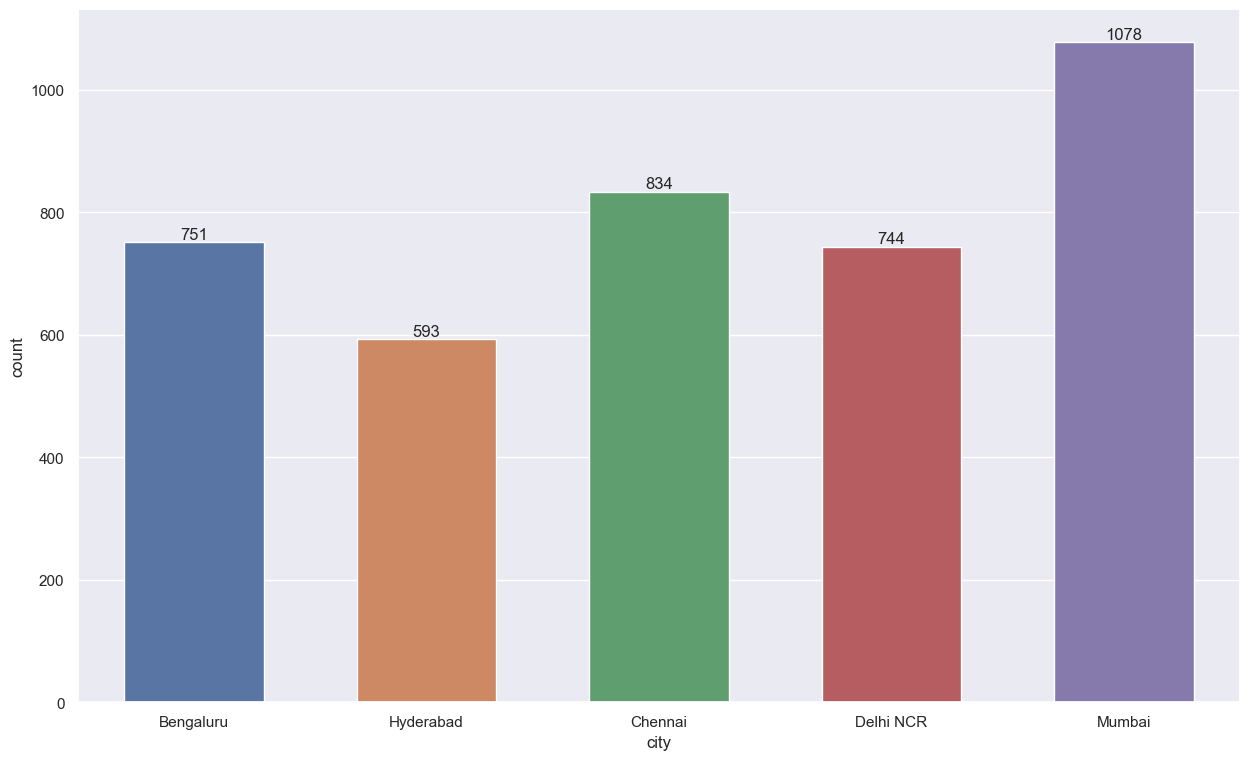

In [43]:
ax=sns.countplot(x='city',data=customers,width=0.6)
for bars in ax.containers:
    ax.bar_label(bars)
#counting the no of employees staying in a particular city
#most people are residing in mumbai

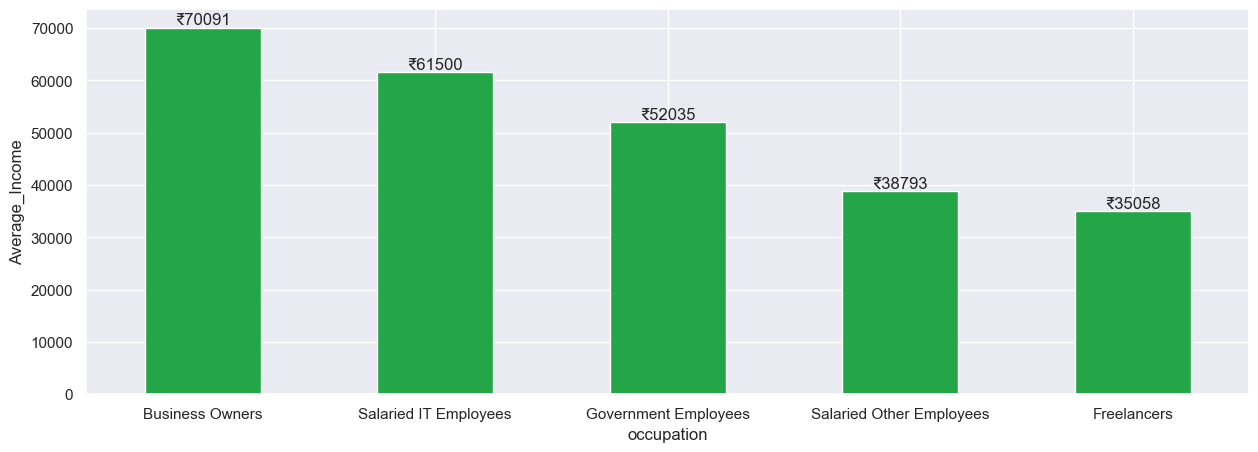

In [80]:
ax=df1.sort_values(ascending=False).plot(kind='bar',ylabel='Average_Income',color='#24a648')
plt.rcParams["figure.figsize"] = [15,5]
plt.xticks(rotation=0)
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%d')
#average_income by profession
#we can see that buisness owners are the ones with max avg income.

<Axes: ylabel='gender'>

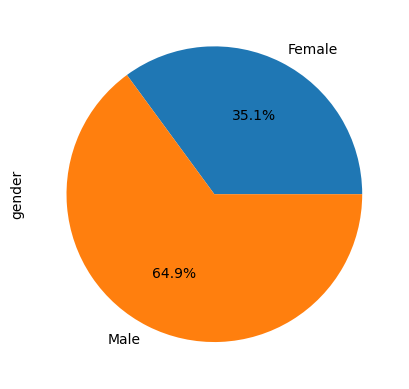

In [6]:
customers.groupby('gender')['gender'].count().plot(kind='pie',autopct='%1.1f%%')
#shows that no of male employees are more

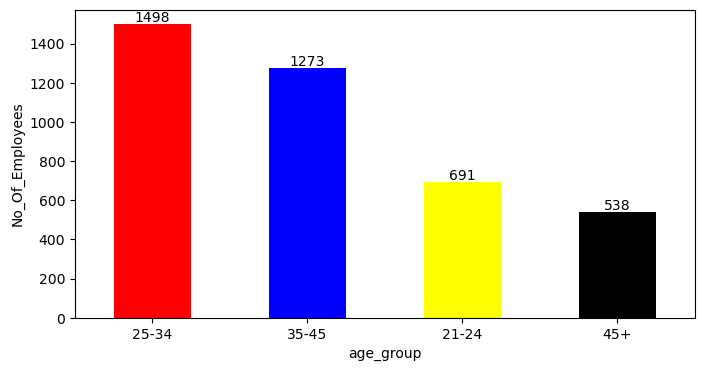

In [8]:
ax=customers.groupby('age_group')['age_group'].count().sort_values(ascending=False).plot(kind='bar',ylabel='No_Of_Employees',color=['red','blue','yellow','black'],figsize=(8,4))
plt.xticks(rotation=0)
for bars in ax.containers:
    ax.bar_label(bars)   

# Avg income utilisation.

In [10]:
combined=customers.merge(spending)
combined.head()
#we are doing an inner join and joining values by customer id

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


In [11]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864000 entries, 0 to 863999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customer_id     864000 non-null  object
 1   age_group       864000 non-null  object
 2   city            864000 non-null  object
 3   occupation      864000 non-null  object
 4   gender          864000 non-null  object
 5   marital status  864000 non-null  object
 6   avg_income      864000 non-null  int64 
 7   month           864000 non-null  object
 8   category        864000 non-null  object
 9   payment_type    864000 non-null  object
 10  spend           864000 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 79.1+ MB


In [12]:
combined.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


<b> Using lamda function </b>

In [20]:
combined=combined.assign(UTI=lambda x:((x['spend']/x['avg_income'])*100))
combined.head()
#used lambda function for UTI calculation.

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,UTI
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,0.550848
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,1.490690
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,3.760728
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,0.493723
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,0.454280


In [31]:
combined.groupby(['occupation'])['UTI'].mean().sort_values(ascending=False).reset_index().style.background_gradient().hide_index()
#reset_index() converts the series of groupby into dataframe.
#we can see that salaried IT employees are one with max uti%
#buisness owners and govt employees spends much less 

C:\Users\Arghyadeep\AppData\Local\Temp\ipykernel_36272\1718987166.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  combined.groupby(['occupation'])['UTI'].mean().sort_values(ascending=False).reset_index().style.background_gradient().hide_index()


occupation,UTI
Salaried IT Employees,1.414624
Freelancers,1.270756
Salaried Other Employees,1.167415
Business Owners,0.923335
Government Employees,0.804519


In [9]:
customers.where(combined.occupation=='Salaried IT Employees')['occupation'].count()

1512

In [20]:
combined.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend,UTI
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405,0.550848
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096,1.490690
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765,3.760728
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363,0.493723
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334,0.454280


In [12]:
sns.set_theme(style="darkgrid")

# Spending Insights

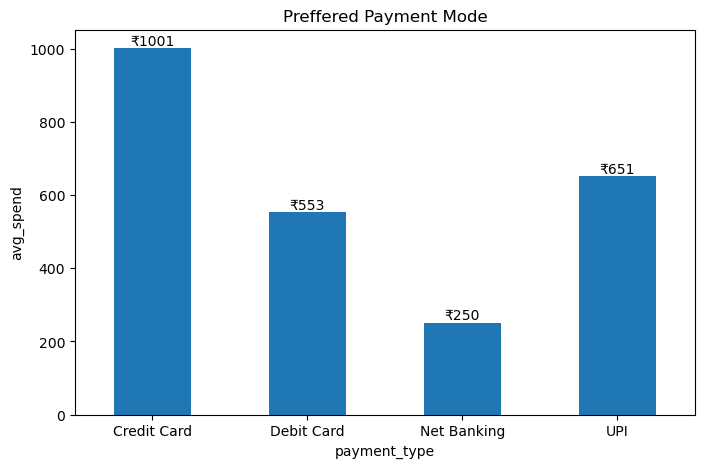

In [32]:
ax=combined.groupby('payment_type')['spend'].mean().plot(kind='bar',rot=0,ylabel='avg_spend',figsize=(8,5),title='Preffered Payment Mode')
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%d')
#people prefer credit card as their mode of payment.

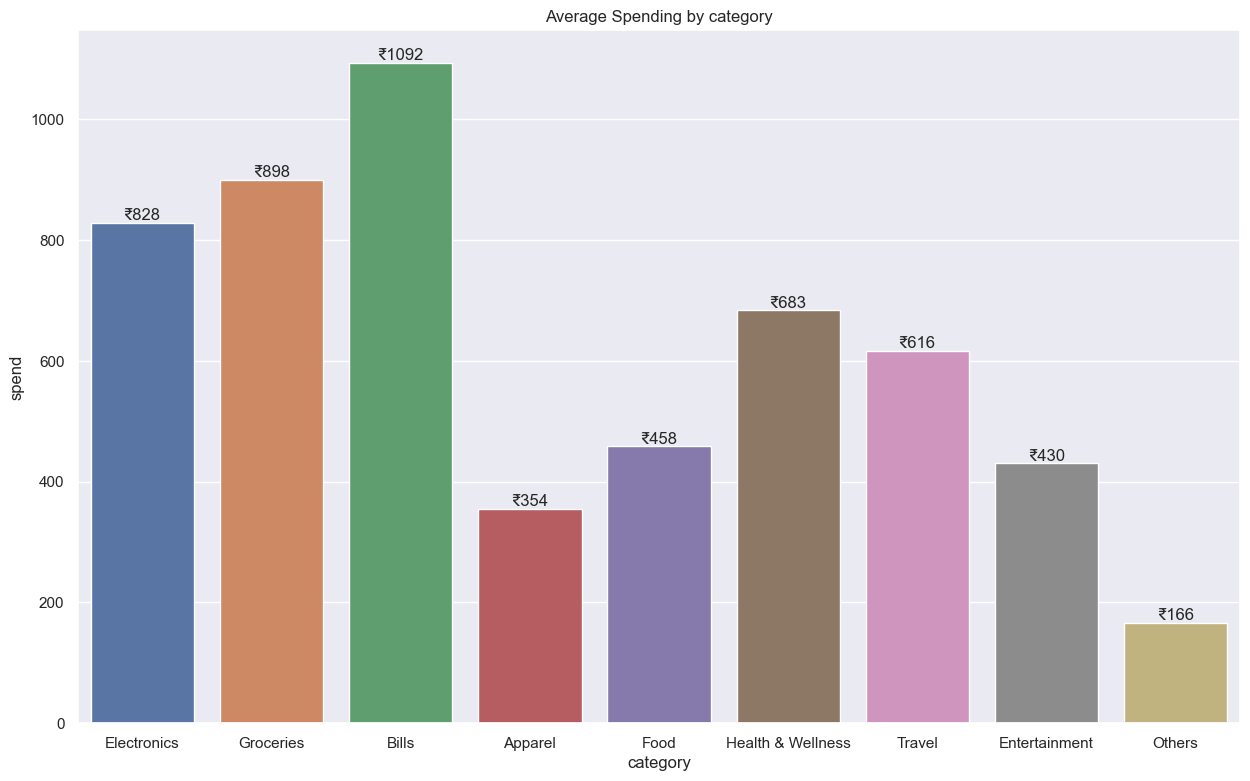

In [38]:
ax=sns.barplot(data=combined,x='category',y='spend',estimator='mean',errorbar=None)
sns.set(rc={'figure.figsize':(15,9)})
ax.set(title='Average Spending by category')
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%d')
#the barplot shows people spends the most on bills.            

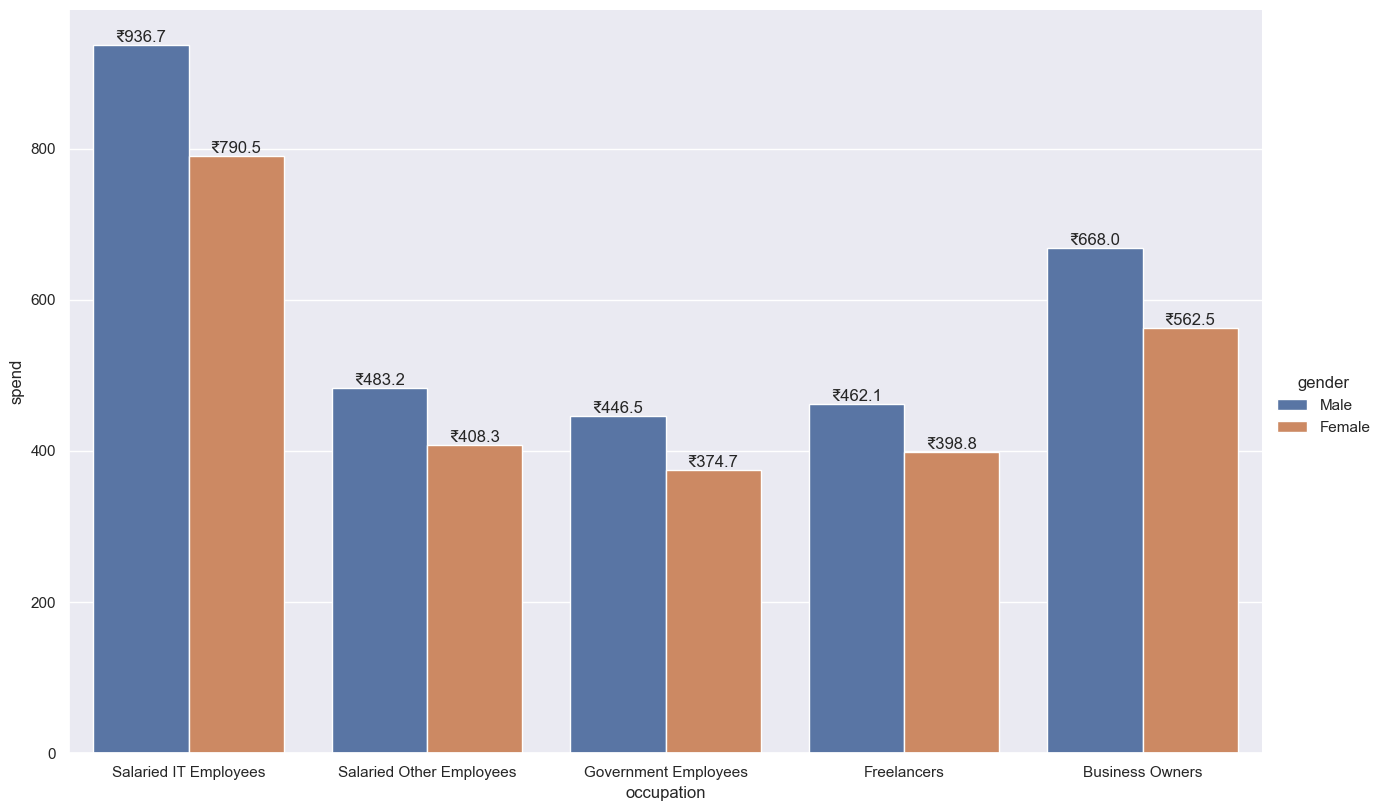

In [85]:
g=sns.catplot(data=combined,x='occupation',y='spend',estimator='mean',kind='bar',errorbar=None, height=8.27, aspect=11.7/7.5,hue='gender')
ax = g.axes.flat[0]
for c in ax.containers:
    ax.bar_label(c, label_type='edge',fmt='\u20B9%.1f')
#we can visualize that the salaried IT employees are the one who spends the most

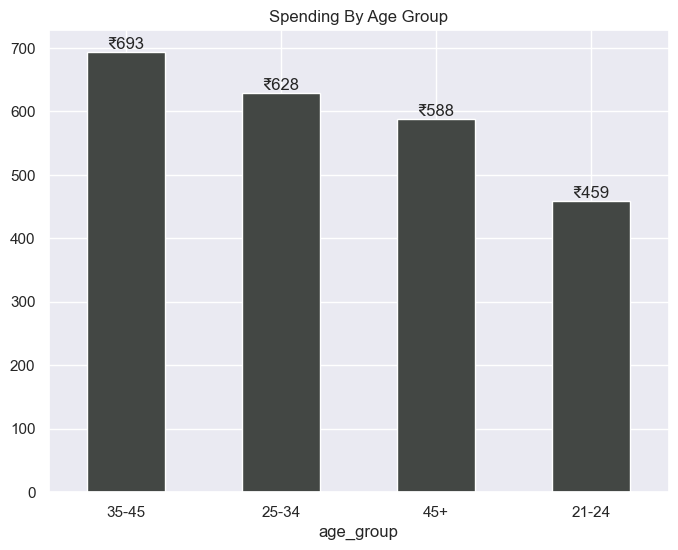

In [39]:
ax=combined.groupby(['age_group'])['spend'].mean().sort_values(ascending=False).plot(kind='bar',color='#434744',figsize=(8,6),title='Spending By Age Group')
#plt.rcParams["figure.figsize"] = [8,5]
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%d')
plt.xticks(rotation=0)
plt.show()
#the below bar chart shows that age-group 35-45 spends the most on 


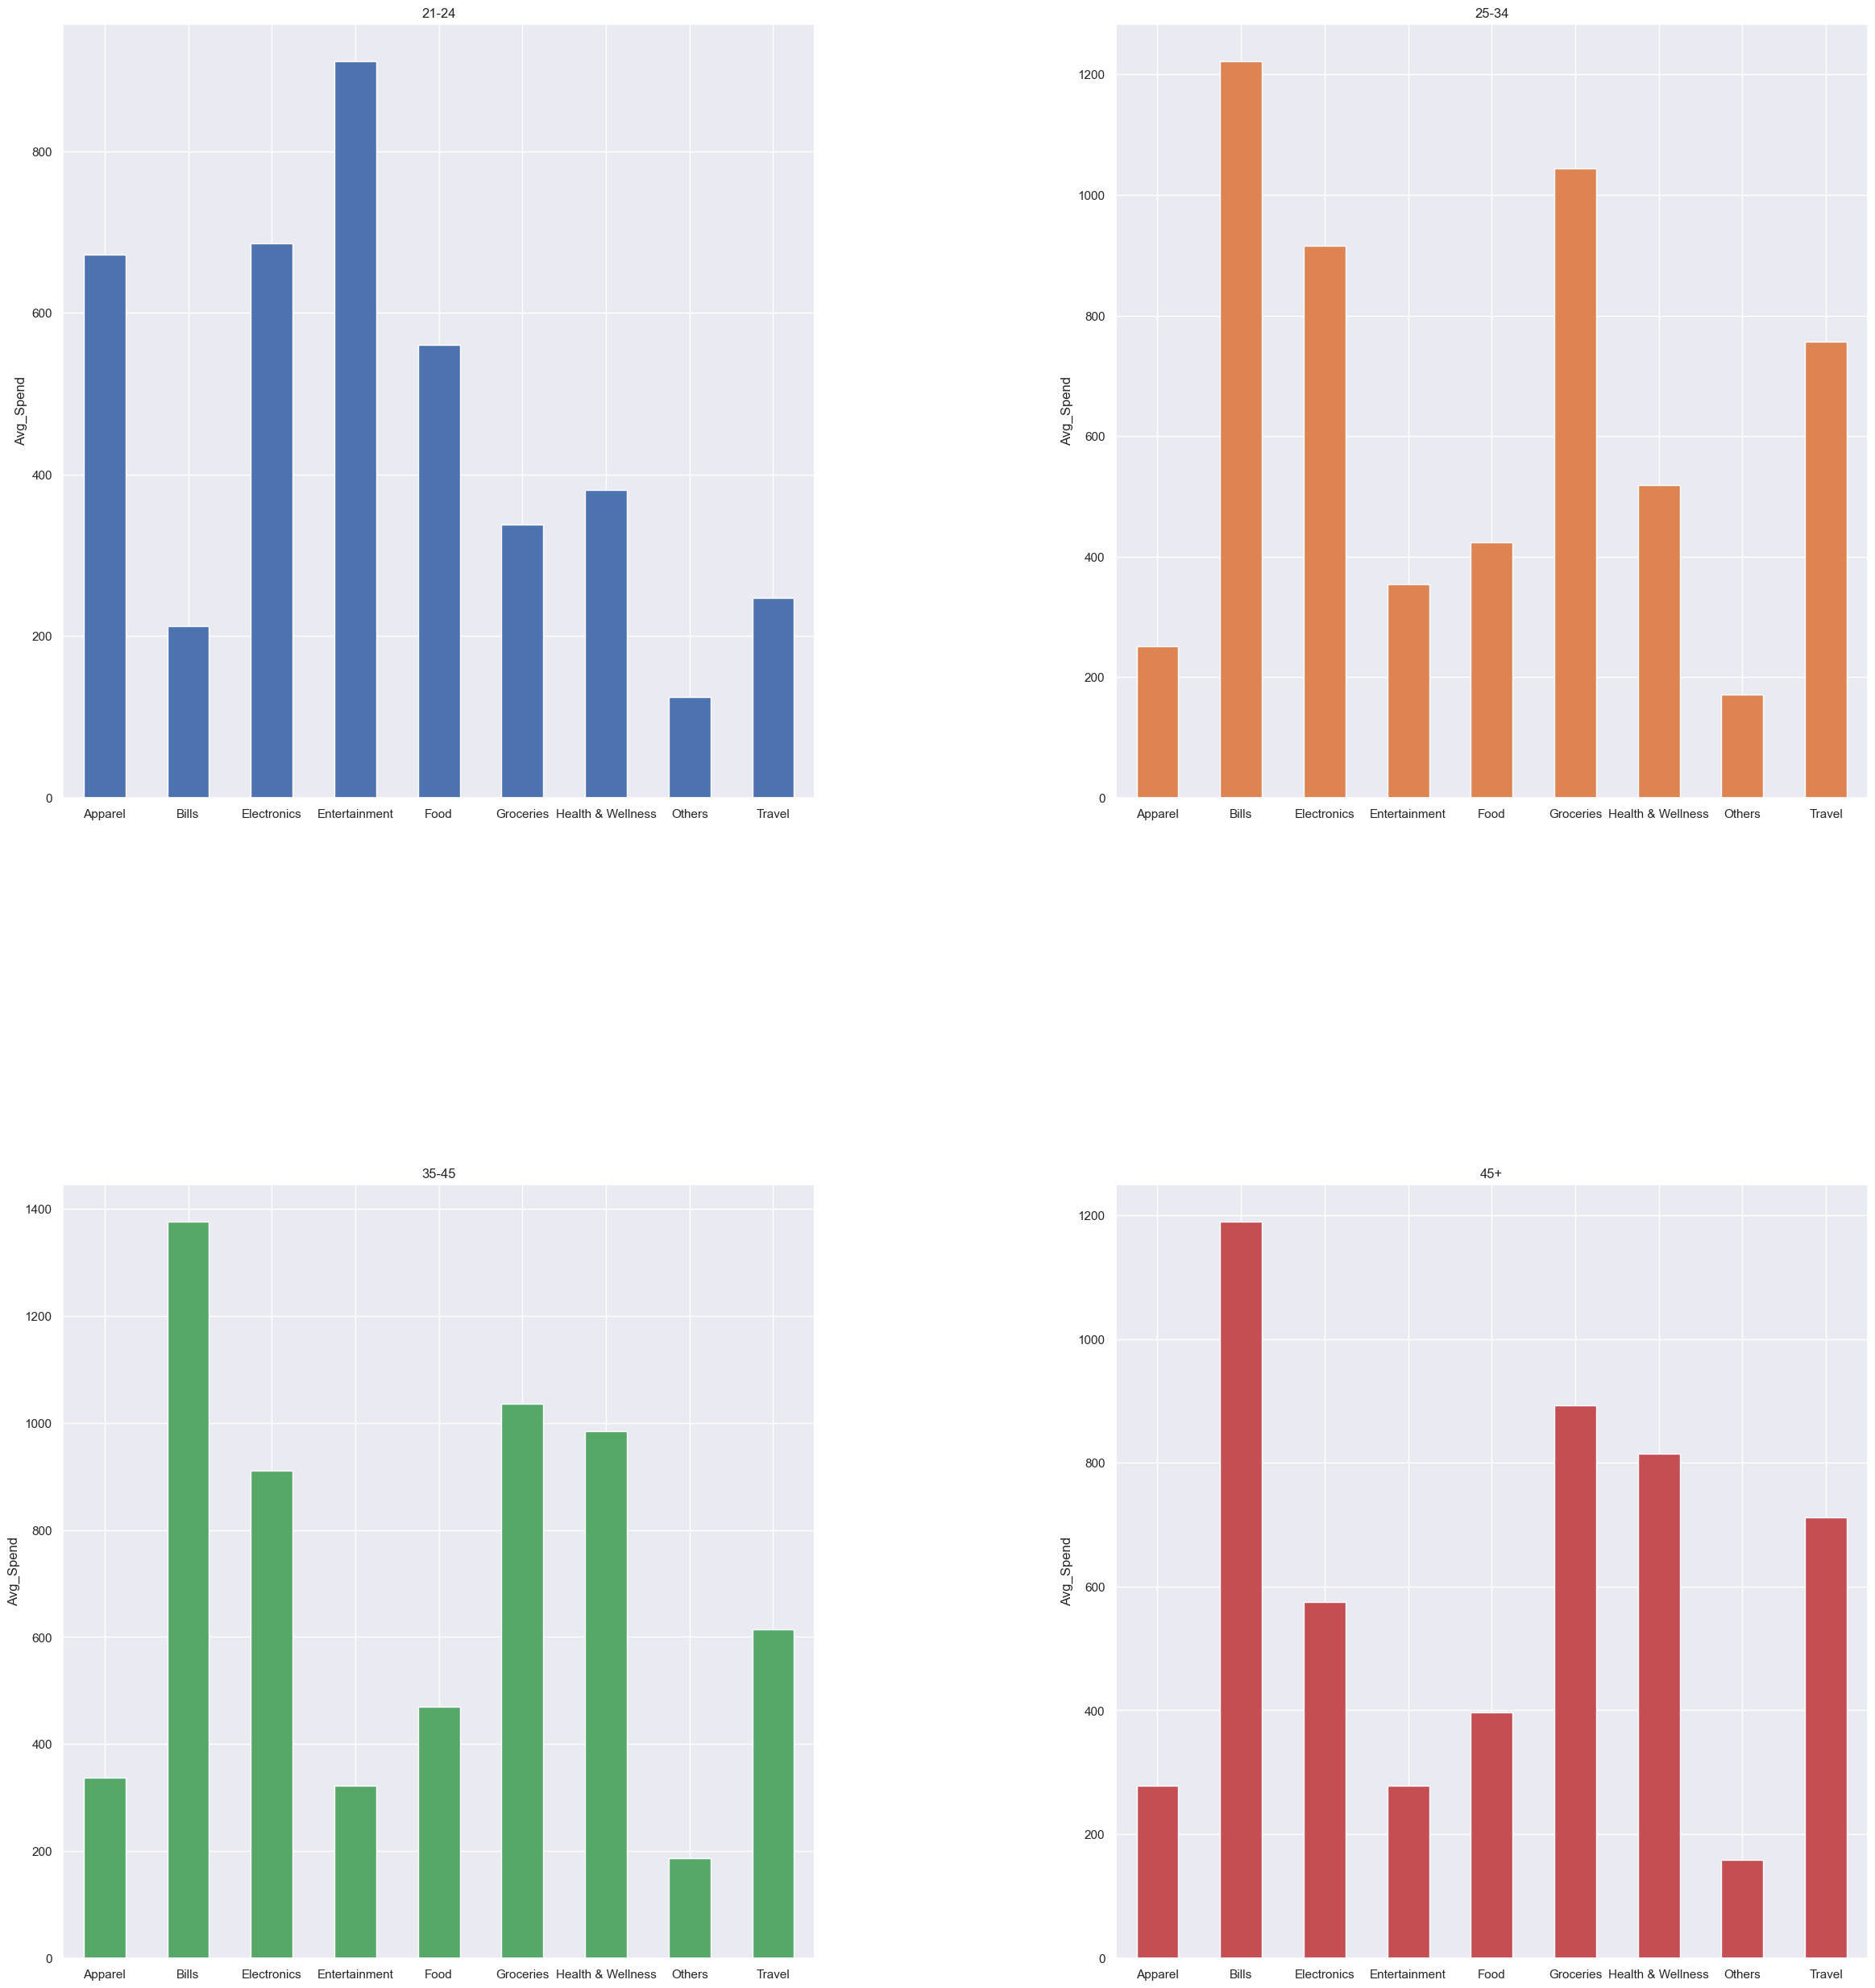

In [141]:
ax=combined.groupby(['category','age_group'])['spend'].mean().unstack().plot(kind='bar',subplots=True,align='center',sharex=False,ylabel='Avg_Spend',xlabel='',figsize=(28,30),rot=0,legend=False,layout=(2,2))
#unstack() unpivots the columns
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=1.0, wspace=0.4, hspace=0.5)
plt.show()
# plt.xlabel('Category',labelpad=10.0)
# plt.ylabel('Average Spending')
# plt.figure(figsize=(50,20))
# plt.rcParams["figure.figsize"]=[16,8]

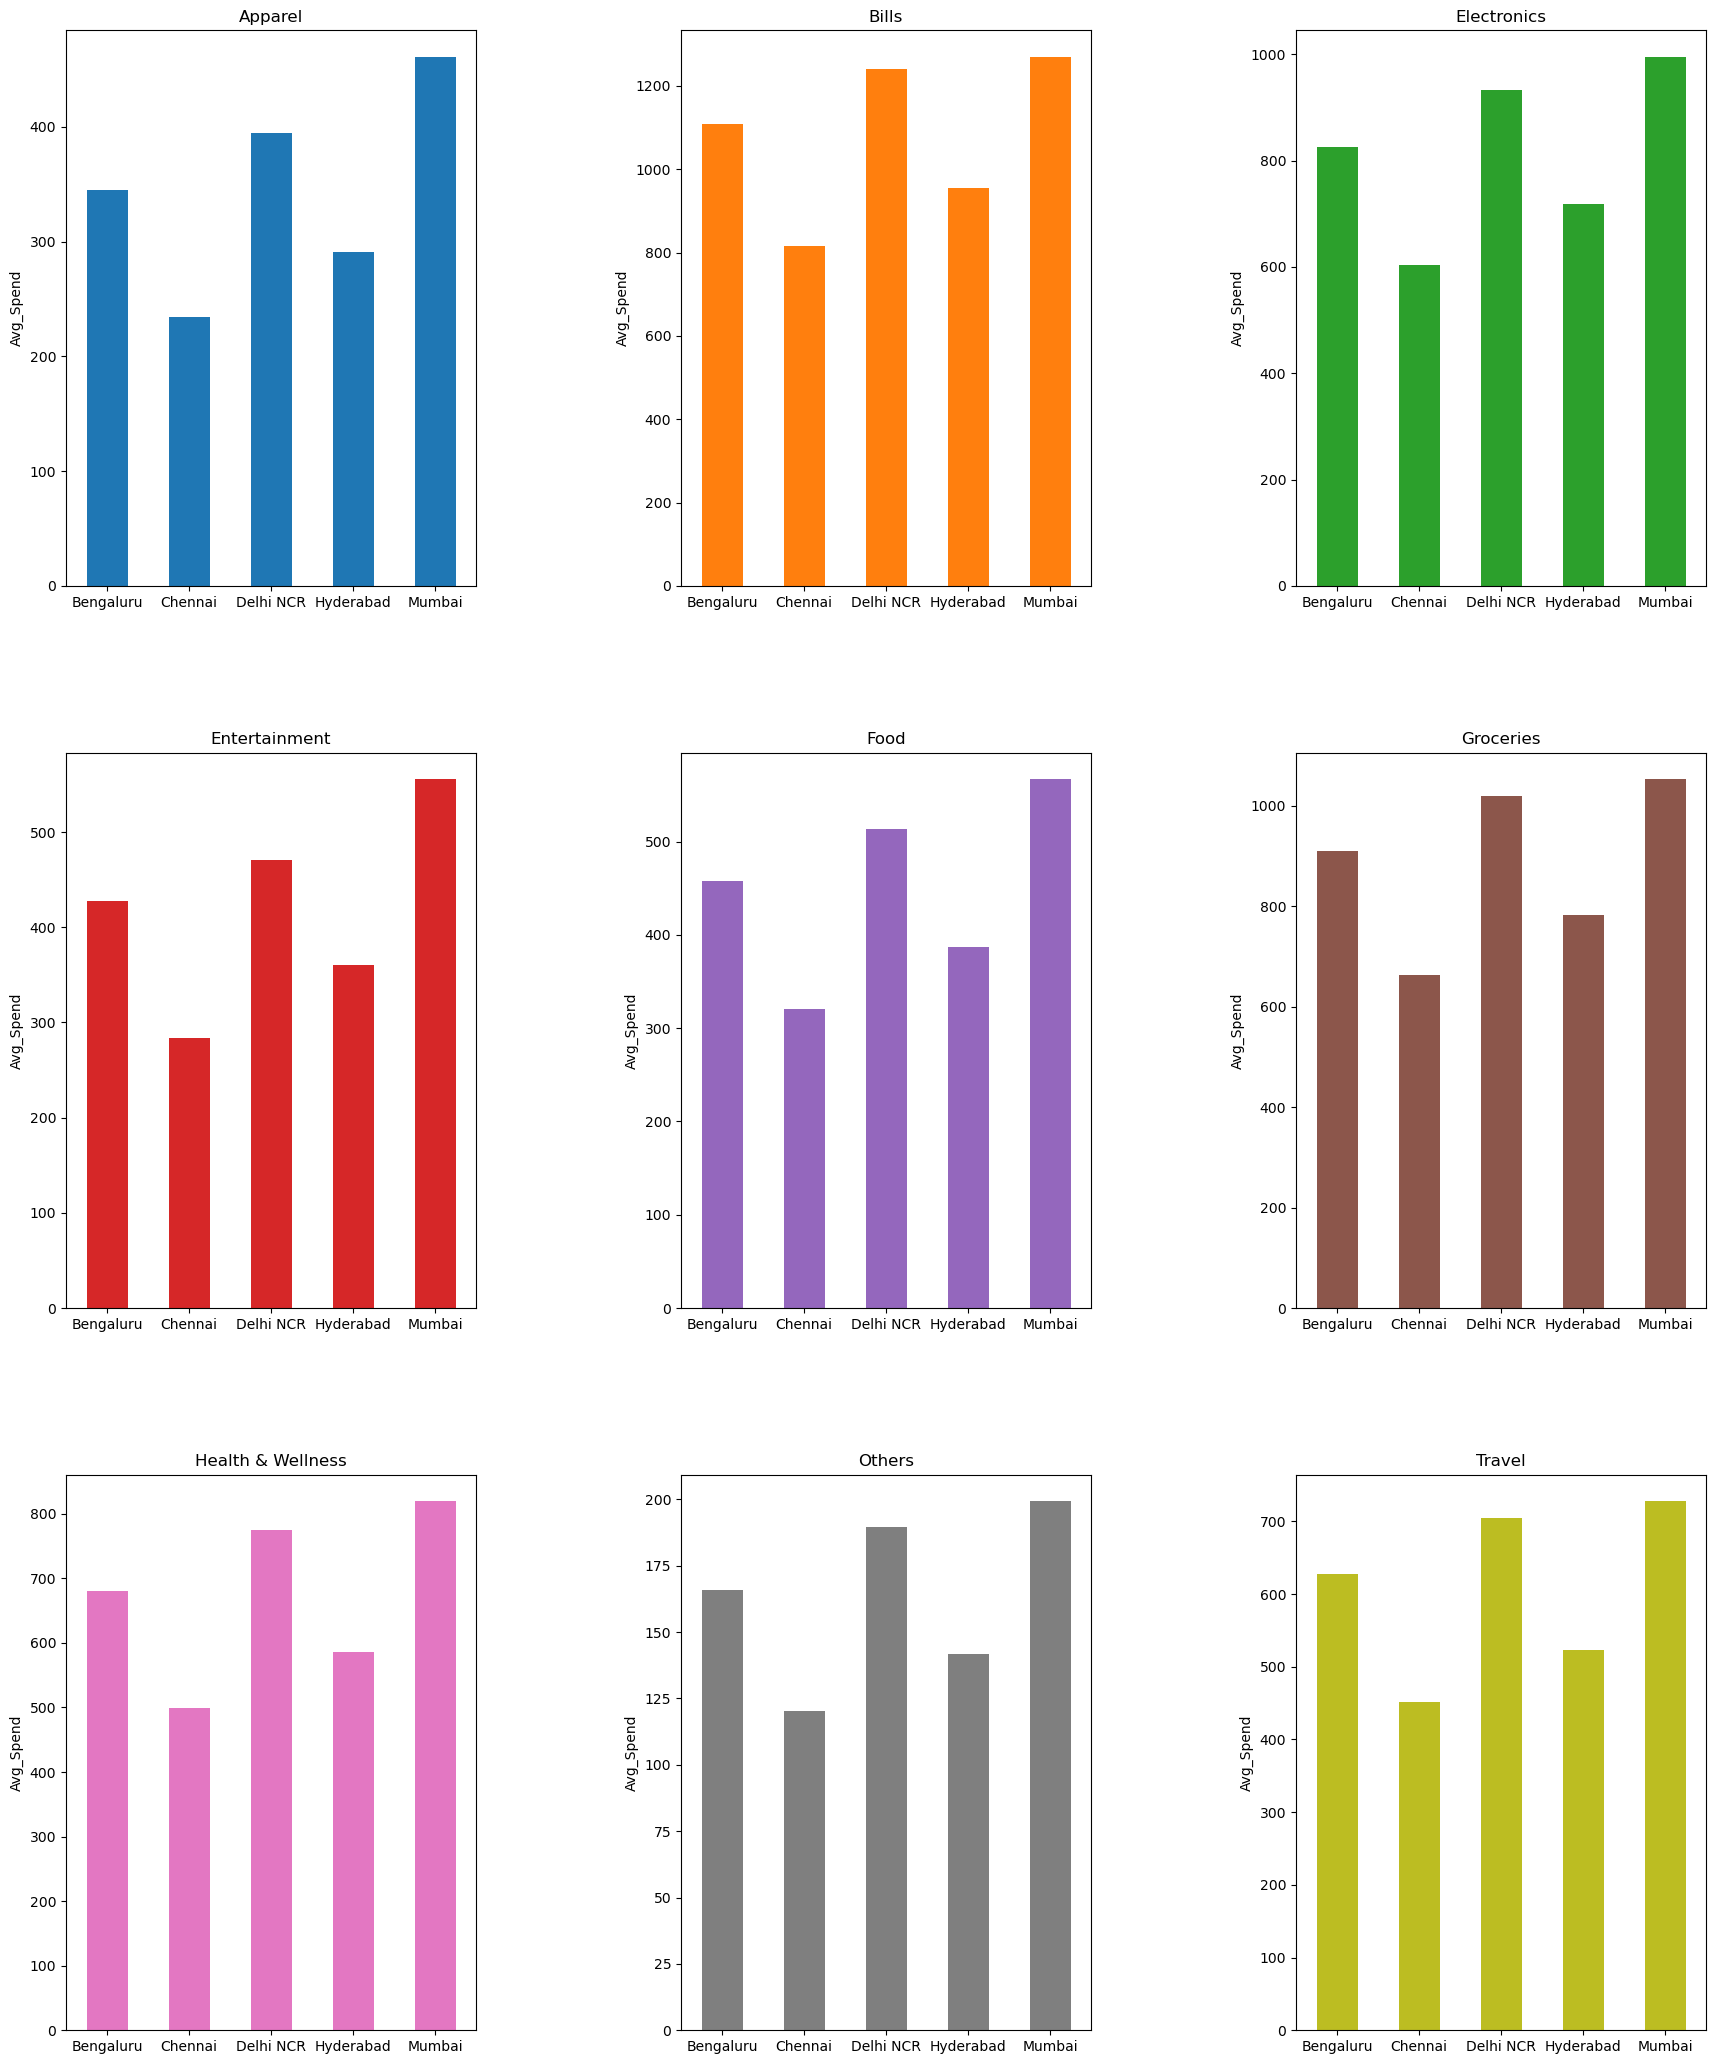

In [53]:
ax=combined.groupby(['city','category'])['spend'].mean().unstack().plot(kind='bar',subplots=True,align='center',sharex=False,ylabel='Avg_Spend',xlabel='',figsize=(20.5,25),rot=0,legend=False,layout=(3,3))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=1.0, wspace=0.5, hspace=0.3)
plt.show()
#different subplots relates to category wise spend in different cities.
#this gives us an overall view of the category wise spending in different cities and based on this info we can give suitable discounts.



# Key Customer Insights

<b> Analyzing trends of customers who uses credit cards. </b>

In [197]:
combined.groupby(['payment_type','occupation'])['spend'].sum()

payment_type  occupation              
Credit Card   Business Owners              36014430
              Freelancers                  26020606
              Government Employees         15736367
              Salaried IT Employees       101405325
              Salaried Other Employees     37132145
Debit Card    Business Owners              19616090
              Freelancers                  17373485
              Government Employees          8992613
              Salaried IT Employees        54324742
              Salaried Other Employees     19250299
Net Banking   Business Owners              10055701
              Freelancers                   7704924
              Government Employees          3494042
              Salaried IT Employees        24458430
              Salaried Other Employees      8495333
UPI           Business Owners              22318488
              Freelancers                  24439623
              Government Employees          7899396
              Salaried IT

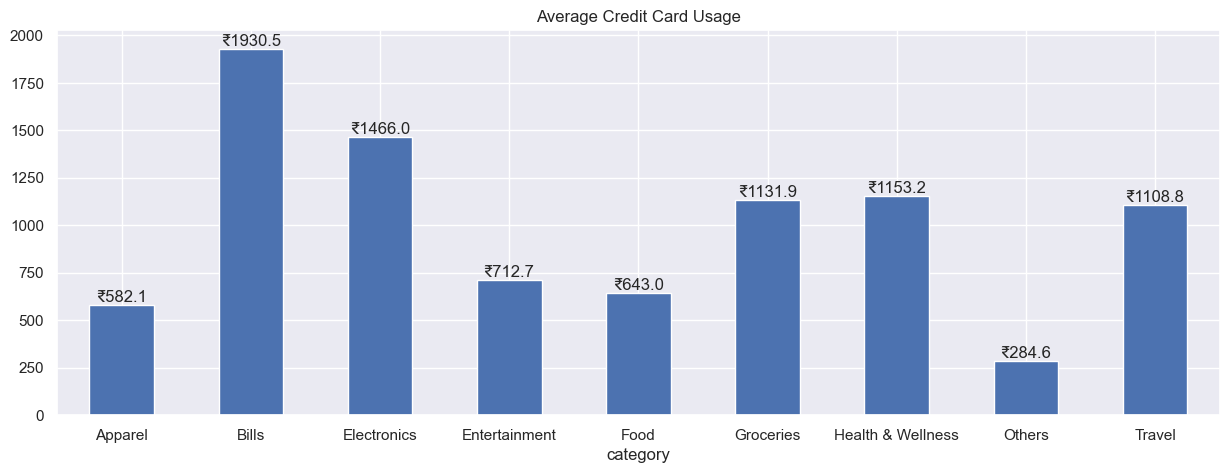

In [40]:
ax=combined.query("payment_type=='Credit Card'").groupby('category')['spend'].mean().plot(kind='bar',rot=0,figsize=(15,5),title='Average Credit Card Usage')
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%.1f')

#people pay their bills via credit card the most followed by electronics

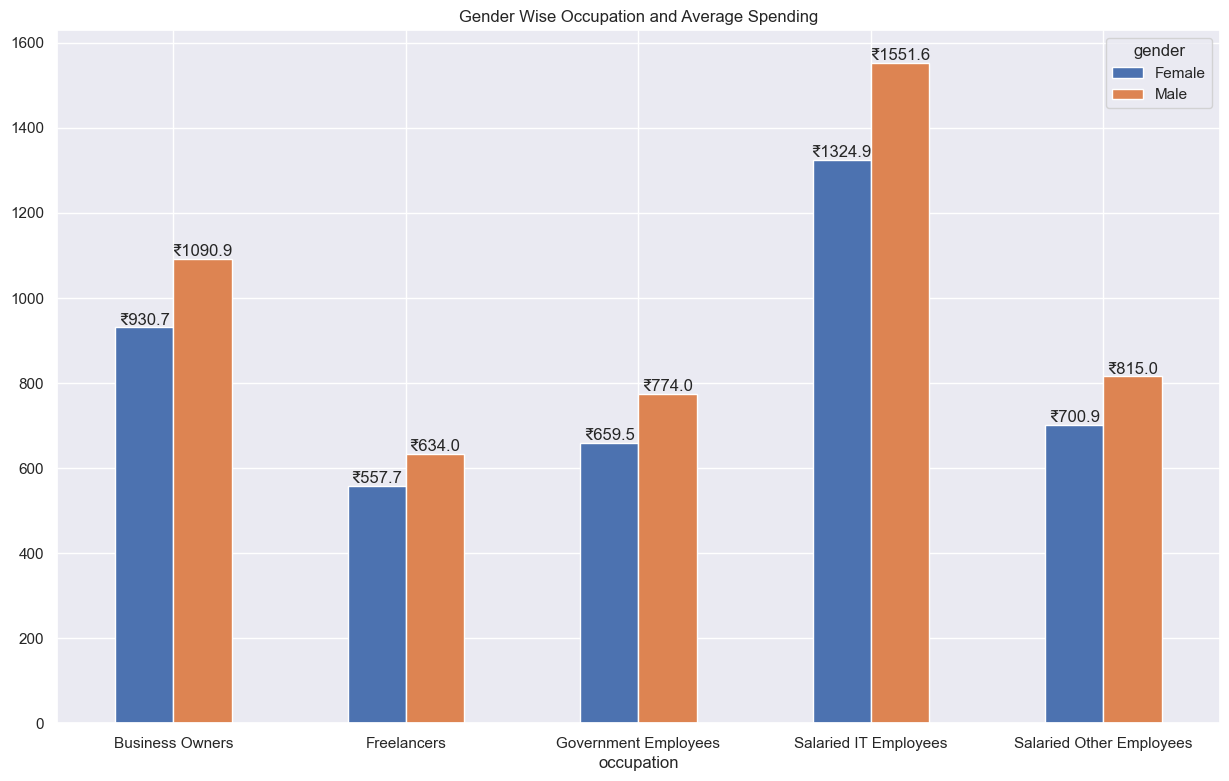

In [41]:
ax=combined.query("payment_type=='Credit Card'").groupby(['occupation','gender'])['spend'].mean().unstack().plot(kind='bar',rot=0,width=0.5,title='Gender Wise Occupation and Average Spending')
#query filters the rows based on payment type which is credit card.
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%.1f')
#We can see that salaried IT employees are the ones who spends the most via credit cards.

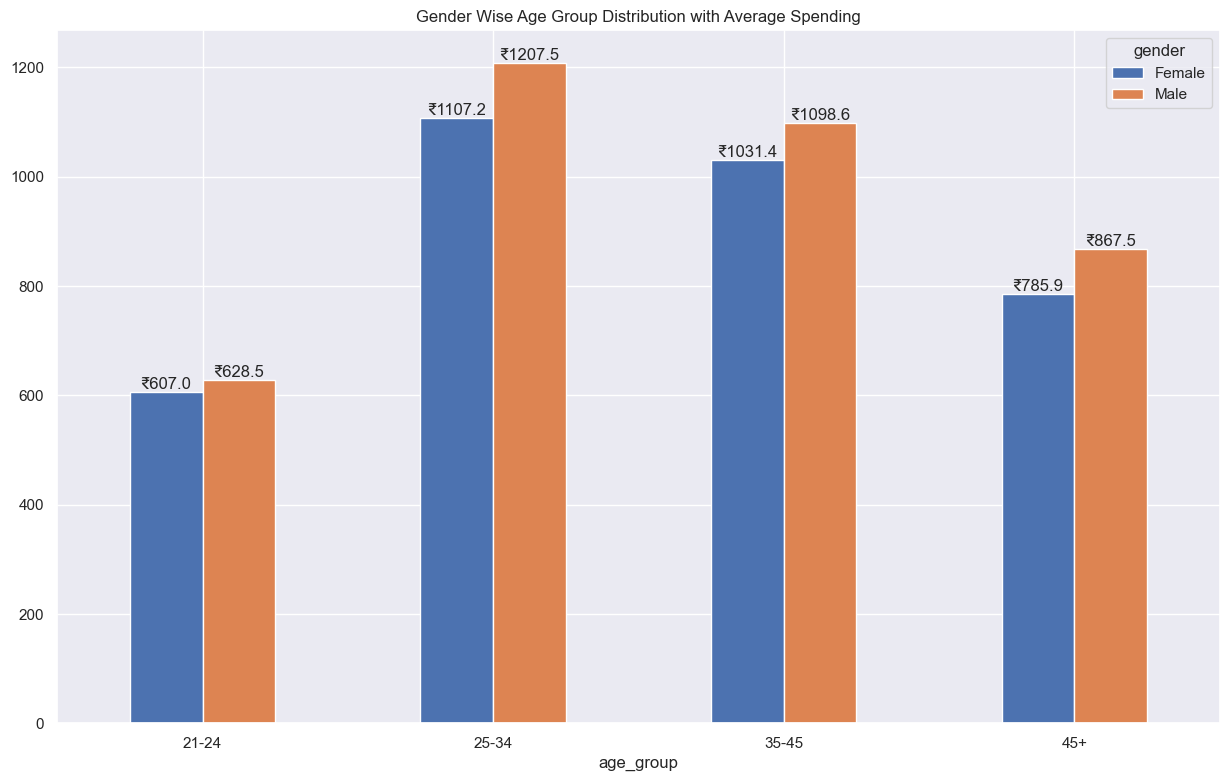

In [42]:
#which age_group spends the most via credit card.
ax=combined.query("payment_type=='Credit Card'").groupby(['age_group','gender'])['spend'].mean().unstack().plot(kind='bar',rot=0,title='Gender Wise Age Group Distribution with Average Spending')
for bars in ax.containers:
    ax.bar_label(bars,fmt='\u20B9%.1f')
# we can see that people from age group 25-34 which represents the youth coummunity are the one who spends the most via credit card. 

##### Demographics Insights

- Most of the users stay in Mumbai
- Around 65% of users are male
- Much of the users are in the age group 25-34 followed by 35-45

##### Spending and Average Income Utilization Insights

- Business Owners have the highest average income followed by salaried IT employees.
- Salaried IT employees are the ones with highest UTI% followed by freelancers.
- Males generally spends more irrespective of occupation.
- Mostly spends through their credit cards as compared to other payment modes.
- People mostly pay their bills followed by groceries and electronics.

##### Age group spending insights and City wise spending insights

- Age Group 21-24 mostly spends on Entertainment, Electronics,Food and apparel hence some good discounts and attractive offers can be launched for this segment of people.
- Bills spending are highest on all age groups except 21-24.
- People living in Mumbai has the highest average spending from all categories.

##### Additional Insights based on Credit Card Usage Patterns

- Business Onwers mostly use Credit Cards as their mode of payment.
- People mostly pay bills and spends on electronics via credit card, travel and food spending via credit card is low hence offer much more offers can be given here to increase the overall credit card usage.

##### My Thoughts

1. Mumbai, Delhi and Banglore are top 3 cities where average spending is more, hence initially the credit cards can be introduced to the people residing in these cities.
2. Salaried Employees are the ones who will use credit cards more as compared to other occupations.
3. Credit Cards must have offers based on age group,occupation and diverse spending range to increase the overall credit card spending.
4. Mitron Bank should also provide some special incentives to females so that their credit usage increase.